# Data Discretization

Data discretization ek technique hai jo continuous numerical data ko discrete categories ya intervals (bins) me divide karti hai. Iska matlab hai data ke values ke range ko chhoti groups ya categories me convert karna, jisse analysis aur modeling easy ho jaye.

## Why Use Data Discretization?

    Simplify Data Representation:

Large numerical values ko categories me tod ke simplify karta hai.

Example: Age (continuous) → Young, Adult, Senior.

    Improve Model Interpretability:

Discrete categories samajhne me easy hoti hain, especially for decision trees and rules-based models.

    Handle Non-Linear Relationships:

Continuous data ke complex patterns ko discrete intervals me tod ke relationships zyada visible banata hai.

    Feature Engineering:

Helps in creating meaningful features for categorical or ordinal data.

## Types of Data Discretization

### Equal Width Binning

Divides the range of data into equal-sized intervals (bins).

Example: Splitting age range (18–60) into bins like 18–30, 30–42, 42–54, 54–60.

### Equal Frequency Binning

Creates bins so that each bin has an equal number of data points.

Example: Dividing 100 exam scores into bins of 25 scores each.

### Clustering-Based Discretization

Uses clustering algorithms (e.g., K-Means) to group data into natural clusters.

Example: Heights grouped into short, medium, and tall based on clustering.

### Custom Binning

Manually defines bins based on domain knowledge or specific rules.

Example: Income categories like Low (<30k), Medium (30k–60k), High (>60k).

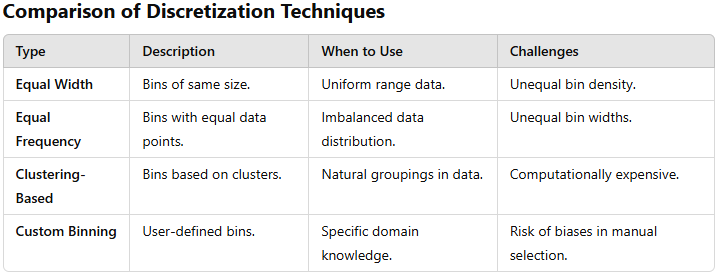

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import KBinsDiscretizer

In [3]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

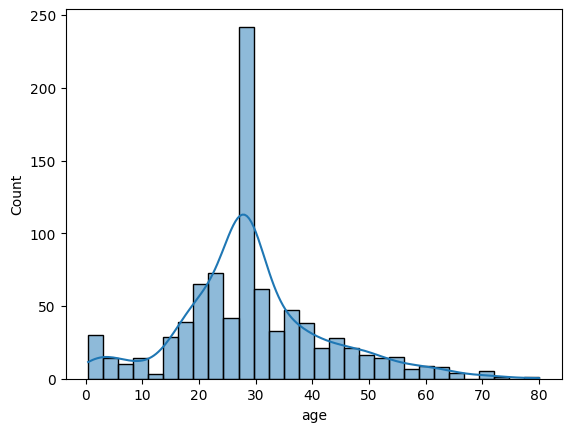

In [8]:
sns.histplot(df['age'], kde=True)

In [4]:
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median)

In [14]:
age_discretizer = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform') 
df['up_age'] = age_discretizer.fit_transform(df[['age']])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,up_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0.0
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0.0


c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

<Axes: xlabel='age', ylabel='Count'>

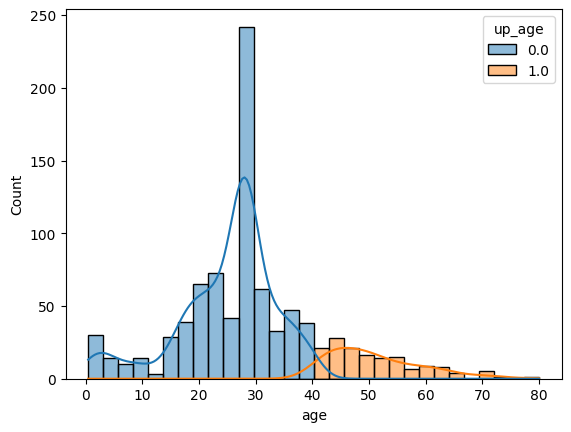

In [15]:
sns.histplot(df, x= 'age', hue= 'up_age', kde= True)

## Bins using pandas

c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a futur

<Axes: xlabel='age', ylabel='Count'>

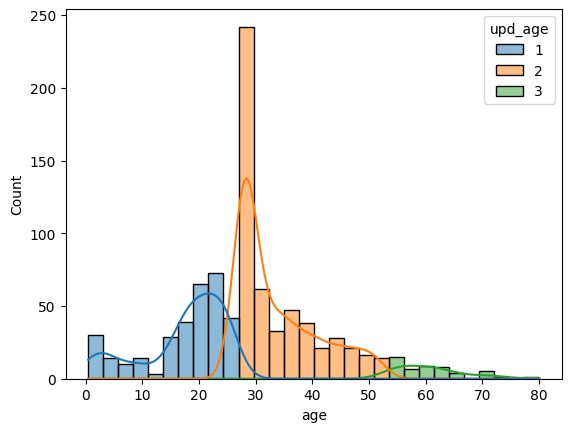

In [18]:
df['upd_age'] = pd.cut(df['age'], bins = 3, labels=[1, 2, 3])
sns.histplot(df, x= 'age', hue= 'upd_age', kde= True)

c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dell\anaconda3\envs\python_ml\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a futur

<Axes: xlabel='age', ylabel='Count'>

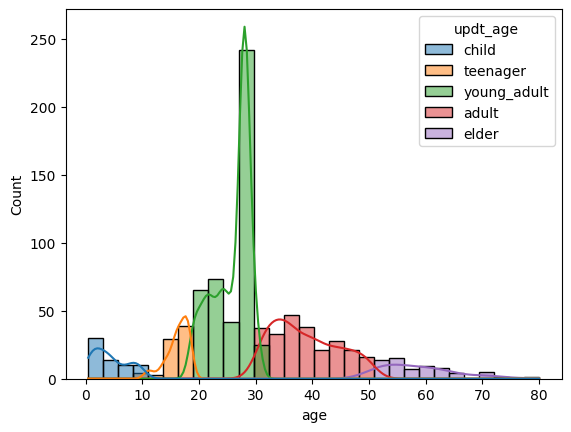

In [21]:
bins = [0, 10, 18, 30, 50, 80]
labels =['child','teenager', 'young_adult', 'adult', 'elder' ]
df['updt_age'] = pd.cut(df['age'], bins=bins, labels=labels)
sns.histplot(df, x= 'age', hue= 'updt_age', kde= True)